In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df= pd.read_csv(r'C:\Users\rawat\Downloads\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [142]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# EDA

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

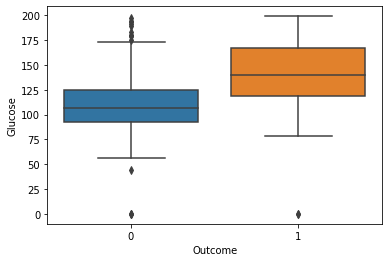

In [150]:
sns.boxplot(data=df,y='Glucose',x='Outcome',)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

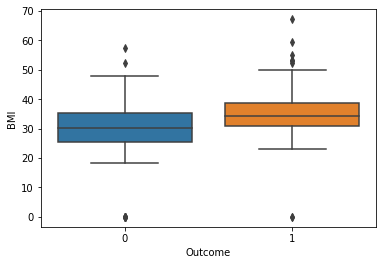

In [151]:
sns.boxplot(data=df,y='BMI',x='Outcome',)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

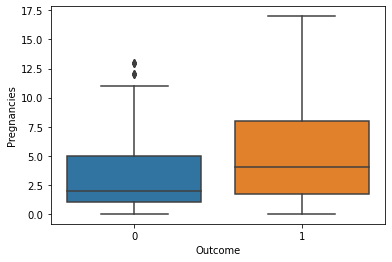

In [153]:
sns.boxplot(data=df,y='Pregnancies',x='Outcome',)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

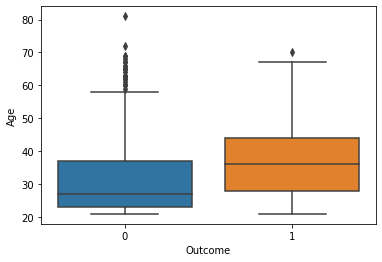

In [154]:
sns.boxplot(data=df,y='Age',x='Outcome',)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

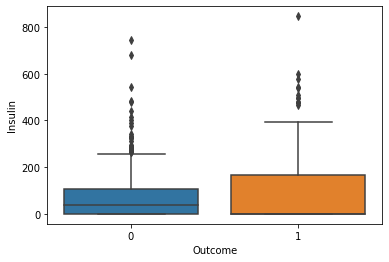

In [155]:
sns.boxplot(data=df,y='Insulin',x='Outcome',)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

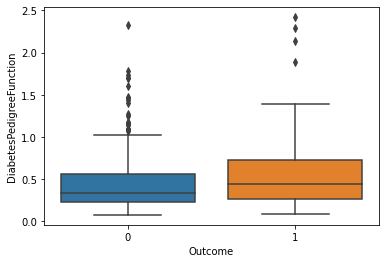

In [156]:
sns.boxplot(data=df,y='DiabetesPedigreeFunction',x='Outcome',)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

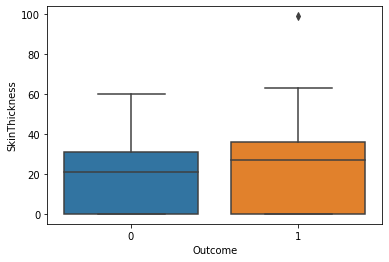

In [161]:
sns.boxplot(data=df,y='SkinThickness',x='Outcome',)

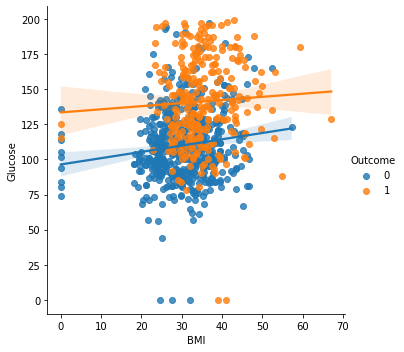

In [164]:
sns.lmplot(x='BMI',y='Glucose',hue='Outcome',data=df)

In [167]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['BloodPressure','DiabetesPedigreeFunction','Outcome'], axis=1),
    df['Outcome'],
    test_size=0.3,
    random_state=0)

In [120]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [13]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.05087981, 0.1029952 , 0.00107267, 0.03246589, 0.07710407,
       0.04603293])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Glucose          0.102995
BMI              0.077104
Pregnancies      0.050880
Age              0.046033
Insulin          0.032466
SkinThickness    0.001073
dtype: float64

In [15]:
y_train.value_counts()

0    343
1    194
Name: Outcome, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression


logreg=LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)



LogisticRegression(class_weight='balanced')

In [17]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.07707608  0.03215802  0.00433405 -0.0008568   0.09076383  0.02809796]]
[-8.34483447]


In [18]:
logreg.score

<bound method ClassifierMixin.score of LogisticRegression(class_weight='balanced')>

In [19]:
y_pred_test=logreg.predict(X_test)

In [20]:
y_pred_train=logreg.predict(X_train)

In [21]:
from sklearn import metrics

print("Test Accuracy: ",metrics.accuracy_score(y_test,y_pred_test))

Test Accuracy:  0.7272727272727273


In [22]:
y_test[y_test.values==1]

661    1
14     1
338    1
588    1
31     1
      ..
400    1
755    1
231    1
165    1
188    1
Name: Outcome, Length: 74, dtype: int64

In [23]:
print("Training Accuracy: ",metrics.accuracy_score(y_train,y_pred_train))

Training Accuracy:  0.7486033519553073


In [24]:
conf=metrics.confusion_matrix(y_test,y_pred_test)

In [27]:
conf

array([[122,  35],
       [ 28,  46]], dtype=int64)

In [29]:
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       157
           1       0.57      0.62      0.59        74

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.73      0.73       231



In [30]:
max_depth=[5,10,15]
criterion=['gini','entropy']

In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn import tree

In [34]:
my_tree_three=tree.DecisionTreeClassifier()
grid=GridSearchCV(estimator=my_tree_three,cv=3,param_grid=dict(max_depth=max_depth,criterion=criterion))

In [35]:
grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15]})

In [36]:
grid.best_score_

0.7337057728119181

In [37]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [67]:
my_tree_three=tree.DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)

In [68]:
my_tree_three.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [43]:
my_tree_three.score(df.drop(labels=['BloodPressure','DiabetesPedigreeFunction','Outcome'], axis=1), df['Outcome'])

0.8203125

# 0.8203125 -DECISION TREE SCORE

In [69]:
y_pred_test=my_tree_three.predict(X_test)

In [70]:
y_pred_train=my_tree_three.predict(X_train)

In [71]:
cr=metrics.classification_report(y_test,y_pred_test)

In [73]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       157
           1       0.69      0.65      0.67        74

    accuracy                           0.79       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



# Random forest regressor


In [165]:
#Build a Random Forest Model

from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(max_depth=10,n_estimators=100,random_state=1)

In [188]:
X=df.drop(labels=['BloodPressure','DiabetesPedigreeFunction','Outcome'], axis=1)
y=df['Outcome']

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y
    ,
    test_size=0.3,
    random_state=0)

In [204]:
y_pred_test=forest.predict(X_test)

In [205]:
y_pred_train=forest.predict(X_train)

In [203]:
my_forest=forest.fit(X_train,y_train)

In [206]:
print(my_forest.score(X_test,y_test))

0.7705627705627706


In [207]:
conf=metrics.confusion_matrix(y_test,y_pred_test)

In [208]:
conf

array([[139,  18],
       [ 35,  39]], dtype=int64)

In [209]:
cr=metrics.classification_report(y_test,y_pred_test)

In [210]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.68      0.53      0.60        74

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



In [173]:
pred=my_forest.predict(X)

In [175]:
list(zip(df.columns,my_forest.feature_importances_))

[('Pregnancies', 0.09593191484492819),
 ('Glucose', 0.3273604180002621),
 ('BloodPressure', 0.08714099234610222),
 ('SkinThickness', 0.09743191721468433),
 ('Insulin', 0.21470125088459502),
 ('BMI', 0.1774335067094282)]

In [176]:
df_confusion_rf=metrics.confusion_matrix(y,pred)

In [177]:
df_confusion_rf

array([[499,   1],
       [ 10, 258]], dtype=int64)

# knn classifier

In [37]:
X_train

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age
580,0,151,46,0,42.1,21
418,1,83,0,0,18.2,27
764,2,122,27,0,36.8,27
363,4,146,0,0,38.5,67
757,0,123,0,0,36.3,52
...,...,...,...,...,...,...
763,10,101,48,180,32.9,63
192,7,159,0,0,30.4,36
629,4,94,22,0,24.7,21
559,11,85,0,0,30.1,35


In [131]:
 from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X_train, y_train)
KNeighborsClassifier(...)

KNeighborsClassifier(n_neighbors=Ellipsis)

In [122]:
y_pred_test=neigh.predict(X_test)

In [123]:
y_test.value_counts()

0    157
1     74
Name: Outcome, dtype: int64

In [95]:
y_pred_train=neigh.predict(X_train)

In [132]:
cr=metrics.classification_report(y_test,y_pred_test)

In [133]:
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       157
           1       0.68      0.43      0.53        74

    accuracy                           0.75       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231



In [126]:
metrics.accuracy_score(y_test,y_pred_test)

0.7532467532467533

In [127]:
from sklearn.model_selection import cross_val_score

In [134]:
# SCORING OPTIONS:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scores = cross_val_score(neigh,X_train,y_train,
                         scoring='r2',cv=5)

In [135]:
scores

array([-0.20401338, -0.04347826, -0.21040724, -0.12971342, -0.18344775])

In [136]:
abs(scores.mean())

0.15421201045107358

# Detection of Optimal Value for K Neighnours

In [90]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

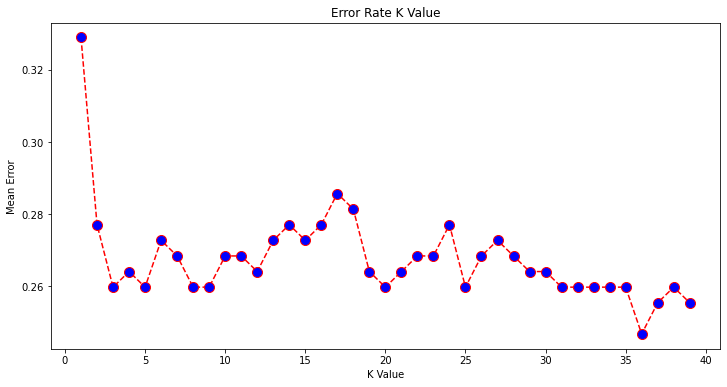

In [91]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()